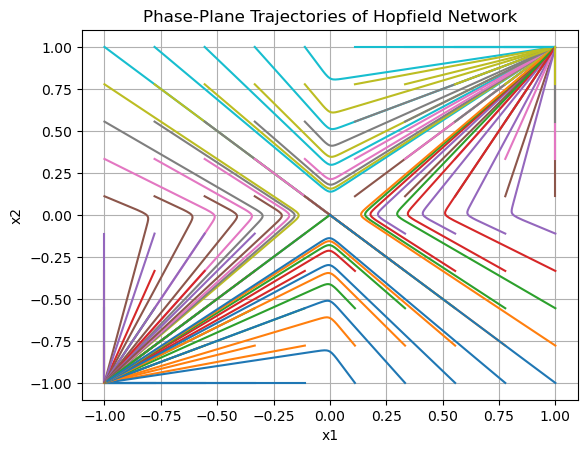

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the weight matrix W and bias vector b
W = np.array([[0, 1], [1, 0]])
b = np.array([0, 0])

# Define the sigmoid activation function
def sigmoid(x):
    return (1 - np.exp(-100 * x)) / (1 + np.exp(-100 * x))

# Define the system of differential equations
def hopfield_network(x, t):
    dxdt = -0.5 * x + 0.5 * np.dot(W.T, sigmoid(x)) + 0.5 * b
    return dxdt

# Set the time points for integration
t = np.linspace(0, 10, 1000)

# Create a grid of initial conditions in the range [-1, 1] x [-1, 1]
x1_range = np.linspace(-1, 1, 10)
x2_range = np.linspace(-1, 1, 10)
initial_conditions = np.array([[x1, x2] for x1 in x1_range for x2 in x2_range])

# Simulate the system for each initial condition
trajectories = []
for initial_condition in initial_conditions:
    x = odeint(hopfield_network, initial_condition, t)
    trajectories.append(x)

# Plot the phase-plane trajectories
for trajectory in trajectories:
    plt.plot(trajectory[:, 0], trajectory[:, 1])

# Set plot labels and title
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Phase-Plane Trajectories of Hopfield Network")

# Show the plot
plt.grid()
plt.show()
